In [2]:
import tensorflow as tf

print("PhysicalDevice:", tf.config.list_physical_devices('GPU'))

PhysicalDevice: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np


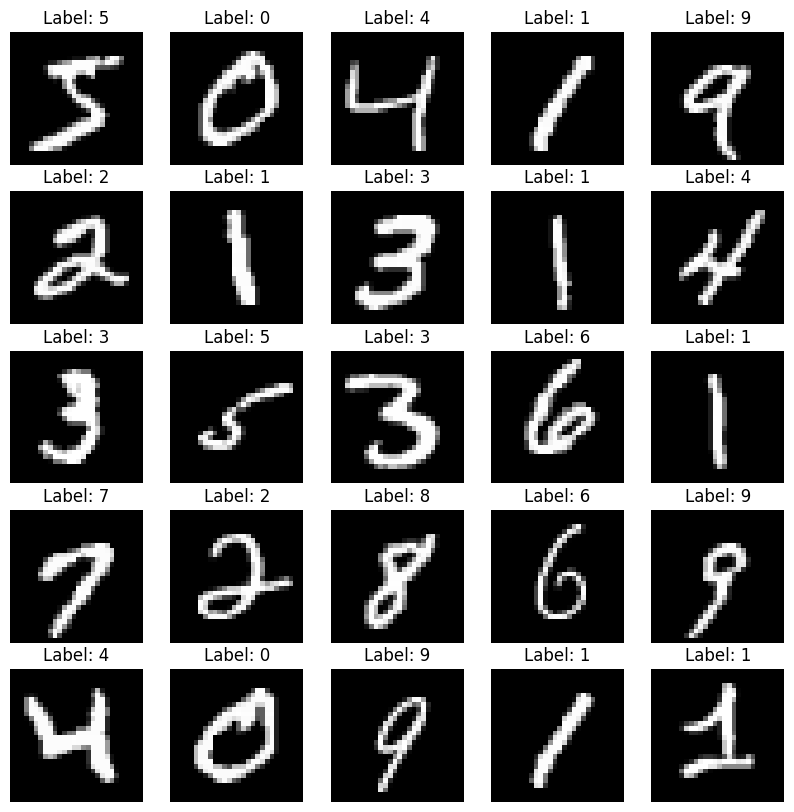

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Function to visualize samples
def plot_mnist_samples(images, labels, num_samples=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i], cmap="gray")
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.show()

# Display first 25 images
plot_mnist_samples(x_train, y_train)

In [ ]:
pip install scikit-learn==1.4.2 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 7.9 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten input for MLP
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Function to create MLP model
def create_mlp(units_1=128, units_2=64, dropout_rate=0.3, optimizer='adam'):
    model = Sequential([
        Dense(units_1, input_shape=(28 * 28,), activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(units_2, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameter search space
param_grid = {
    'mlp__model__units_1': [64, 128],
    'mlp__model__units_2': [32, 64],
    'mlp__model__dropout_rate': [0.2, 0.4],
    'mlp__model__optimizer': ['adam', 'sgd'],
    'mlp__batch_size': [32, 64],
    'mlp__epochs': [5, 10]
}

# Wrap model using KerasClassifier
mlp_clf = KerasClassifier(
    model=create_mlp,
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    verbose=0
)

# Use Pipeline
pipeline = Pipeline([
    ('mlp', mlp_clf)
])


# Use RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=3, cv=2, verbose=2, n_jobs=-1)
random_search.fit(x_train, y_train)

# Print best hyperparameters
print(f"Best Hyperparameters for MLP: {random_search.best_params_}")

# Evaluate the best MLP model
best_mlp = random_search.best_estimator_
test_acc = best_mlp.score(x_test, y_test)
print(f"Test Accuracy (MLP): {test_acc:.4f}")

# Save the best model
best_mlp.named_steps['mlp'].model_.save("best_mlp_model.h5")
print("Best MLP model saved successfully!")

Fitting 2 folds for each of 3 candidates, totalling 6 fits


/Users/alimacbook/miniforge3/envs/MLP/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alimacbook/miniforge3/envs/MLP/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/alimacbook/miniforge3/envs/MLP/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead

[CV] END mlp__batch_size=64, mlp__epochs=5, mlp__model__dropout_rate=0.4, mlp__model__optimizer=adam, mlp__model__units_1=64, mlp__model__units_2=32; total time= 1.8min
[CV] END mlp__batch_size=64, mlp__epochs=5, mlp__model__dropout_rate=0.2, mlp__model__optimizer=adam, mlp__model__units_1=128, mlp__model__units_2=64; total time= 1.8min
[CV] END mlp__batch_size=64, mlp__epochs=5, mlp__model__dropout_rate=0.4, mlp__model__optimizer=adam, mlp__model__units_1=64, mlp__model__units_2=32; total time= 1.8min
[CV] END mlp__batch_size=64, mlp__epochs=5, mlp__model__dropout_rate=0.2, mlp__model__optimizer=adam, mlp__model__units_1=128, mlp__model__units_2=64; total time= 2.0min
[CV] END mlp__batch_size=32, mlp__epochs=10, mlp__model__dropout_rate=0.4, mlp__model__optimizer=sgd, mlp__model__units_1=64, mlp__model__units_2=64; total time= 3.2min
[CV] END mlp__batch_size=32, mlp__epochs=10, mlp__model__dropout_rate=0.4, mlp__model__optimizer=sgd, mlp__model__units_1=64, mlp__model__units_2=64; tot

/Users/alimacbook/miniforge3/envs/MLP/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-27 20:31:36.571045: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-27 20:31:36.571103: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-03-27 20:31:36.571107: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-03-27 20:31:36.571123: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-27 20:31:36.571135: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:27

Best Hyperparameters for MLP: {'mlp__model__units_2': 64, 'mlp__model__units_1': 128, 'mlp__model__optimizer': 'adam', 'mlp__model__dropout_rate': 0.2, 'mlp__epochs': 5, 'mlp__batch_size': 64}


Test Accuracy (MLP): 0.9158
Best MLP model saved successfully!


In [4]:
import pandas as pd


cv_results = pd.DataFrame(random_search.cv_results_)
print(cv_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     192.095720      0.954081         2.144958        0.128095   
1     102.775294      0.906582         3.138937        0.215484   
2     109.561356      7.152416         2.364668        0.636606   

  param_mlp__model__units_2 param_mlp__model__units_1  \
0                        64                        64   
1                        32                        64   
2                        64                       128   

  param_mlp__model__optimizer param_mlp__model__dropout_rate  \
0                         sgd                            0.4   
1                        adam                            0.4   
2                        adam                            0.2   

  param_mlp__epochs param_mlp__batch_size  \
0                10                    32   
1                 5                    64   
2                 5                    64   

                                              params  split0_tes

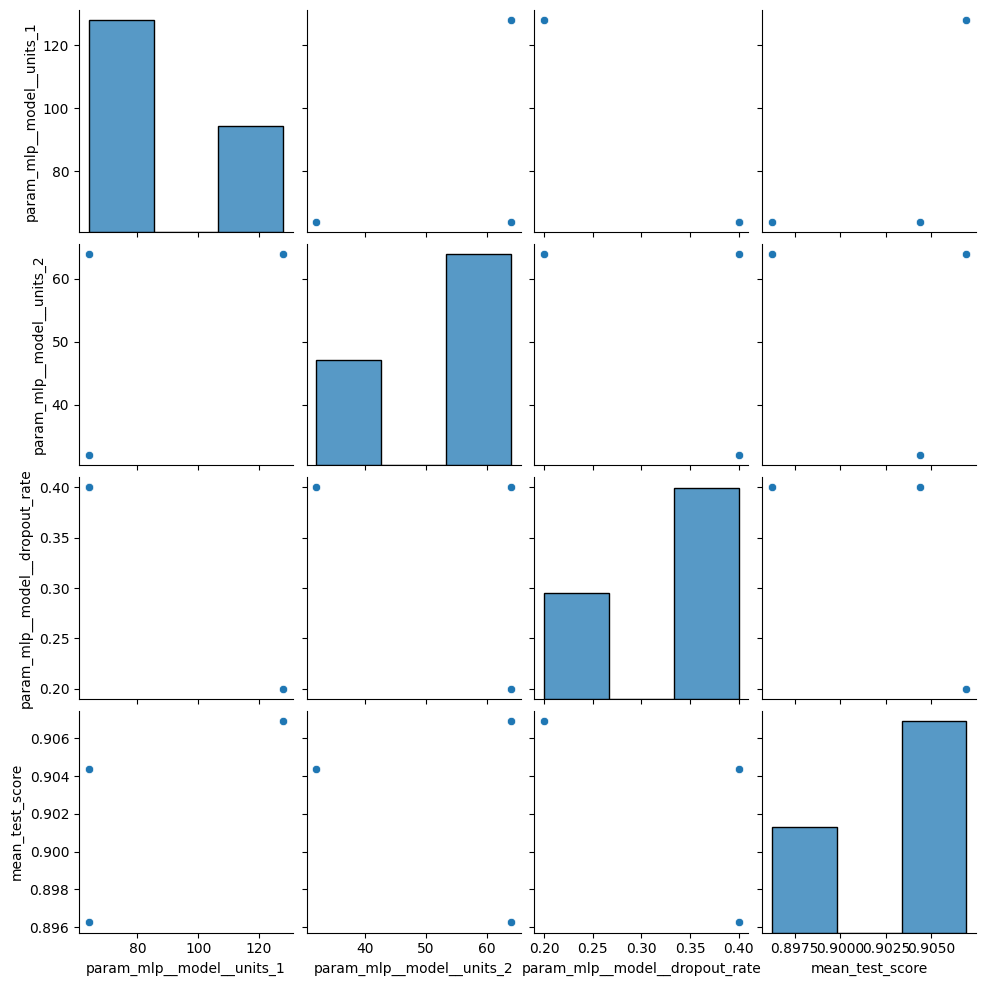

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


cv_results = pd.DataFrame(random_search.cv_results_)
sns.pairplot(cv_results, vars=['param_mlp__model__units_1', 'param_mlp__model__units_2', 'param_mlp__model__dropout_rate', 'mean_test_score'])
plt.show()

In [ ]:

#Extending hyperparameters 
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten input for MLP
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Function to create MLP model
def create_mlp(units_1=128, units_2=64, dropout_rate=0.3, optimizer='adam'):
    model = Sequential([
        Input(shape=(x_train.shape[1],)),  # ✅ Corrected input layer
        Dense(units_1, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(units_2, activation='relu'),
        BatchNormalization(),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')  # Output layer for multi-class classification
    ])
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameter search space (Expanded for better tuning)
param_grid = {
    'mlp__model__units_1': [64, 128, 256],  # Increased range
    'mlp__model__units_2': [32, 64, 128],   # Increased range
    'mlp__model__dropout_rate': [0.2, 0.3, 0.4, 0.5],  # More dropout values
    'mlp__model__optimizer': ['adam', 'sgd', 'rmsprop'],  # Added 'rmsprop'
    'mlp__batch_size': [32, 64, 128],  # Increased range
    'mlp__epochs': [10, 20, 30]  # Increased training time options
}

# Wrap model using KerasClassifier (Corrected argument structure)
mlp_clf = KerasClassifier(
    model=create_mlp,
    verbose=0
)

# Use Pipeline
pipeline = Pipeline([
    ('mlp', mlp_clf)
])

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid, 
    n_iter=5, cv=3, verbose=2, n_jobs=-1  # Increased iterations and cross-validation folds
)
random_search.fit(x_train, y_train)

# Print best hyperparameters
print(f"Best Hyperparameters for MLP: {random_search.best_params_}")

# Evaluate the best MLP model
best_mlp = random_search.best_estimator_
test_acc = best_mlp.score(x_test, y_test)
print(f"Test Accuracy (MLP): {test_acc:.4f}")

# Save the best model
best_mlp.named_steps['mlp'].model_.save("best_mlp2.keras")  # Use `.keras` for new TensorFlow versions
print("Best MLP model saved successfully!")


Fitting 3 folds for each of 5 candidates, totalling 15 fits


2025-03-29 09:45:46.396497: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-29 09:45:46.397197: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-03-29 09:45:46.397220: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-03-29 09:45:46.397363: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-29 09:45:46.398019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-03-29 09:45:46.415241: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-29 09:45:46.415348: I metal_plugin/src/device/metal_device.cc:296] system

[CV] END mlp__batch_size=128, mlp__epochs=30, mlp__model__dropout_rate=0.4, mlp__model__optimizer=sgd, mlp__model__units_1=64, mlp__model__units_2=64; total time= 6.5min
[CV] END mlp__batch_size=128, mlp__epochs=30, mlp__model__dropout_rate=0.4, mlp__model__optimizer=sgd, mlp__model__units_1=64, mlp__model__units_2=64; total time= 6.9min
[CV] END mlp__batch_size=128, mlp__epochs=30, mlp__model__dropout_rate=0.4, mlp__model__optimizer=sgd, mlp__model__units_1=64, mlp__model__units_2=64; total time= 6.9min
[CV] END mlp__batch_size=32, mlp__epochs=10, mlp__model__dropout_rate=0.3, mlp__model__optimizer=rmsprop, mlp__model__units_1=128, mlp__model__units_2=32; total time= 9.0min
[CV] END mlp__batch_size=32, mlp__epochs=10, mlp__model__dropout_rate=0.3, mlp__model__optimizer=rmsprop, mlp__model__units_1=128, mlp__model__units_2=32; total time= 9.5min
[CV] END mlp__batch_size=32, mlp__epochs=10, mlp__model__dropout_rate=0.3, mlp__model__optimizer=rmsprop, mlp__model__units_1=128, mlp__model_

In [8]:
import pandas as pd


cv_results = pd.DataFrame(random_search.cv_results_)
print(cv_results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     566.453477     31.072314         9.554858        1.809214   
1     403.750040      9.421757         2.708441        0.581666   
2     748.693461     90.484879         9.970093        6.242054   
3     557.649771     35.397047         0.904606        0.233787   
4     169.579692     32.874494         2.510992        0.738062   

  param_mlp__model__units_2 param_mlp__model__units_1  \
0                        32                       128   
1                        64                        64   
2                        64                       256   
3                       128                       128   
4                        32                        64   

  param_mlp__model__optimizer param_mlp__model__dropout_rate  \
0                     rmsprop                            0.3   
1                         sgd                            0.4   
2                         sgd                            0.5  

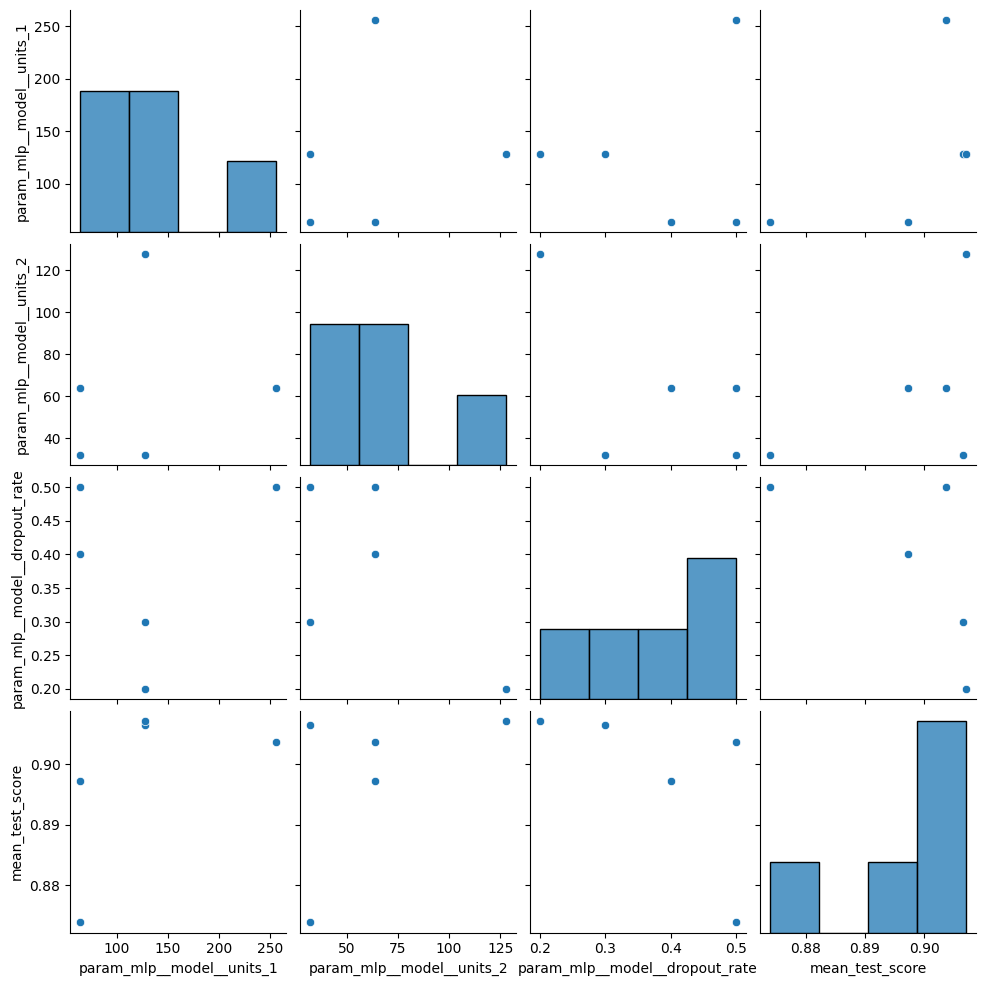

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


cv_results = pd.DataFrame(random_search.cv_results_)
sns.pairplot(cv_results, vars=['param_mlp__model__units_1', 'param_mlp__model__units_2', 'param_mlp__model__dropout_rate', 'mean_test_score'])
plt.show()

In [13]:
best_model = best_mlp.named_steps['mlp'].model_
best_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,896 (1.36 MB)

 Trainable params: 118,794 (464.04 KB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 237,590 (928.09 KB)